In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

plt.style.use('ggplot')

In [2]:
population = np.random.normal(10,3,30000)
sample = population[np.random.randint(0, 30000, 1000)]

9.89101756937251

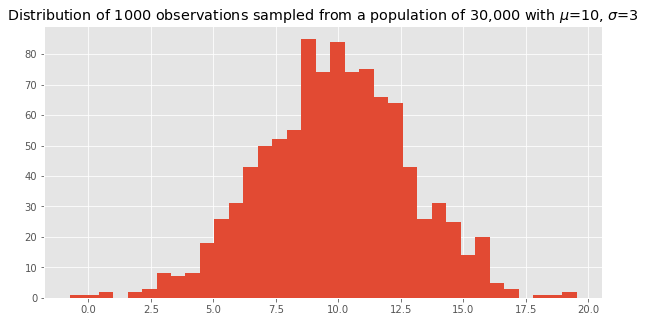

In [3]:
plt.figure(figsize=(10,5))
plt.hist(sample,bins=35)
plt.title("Distribution of 1000 observations sampled from a population of 30,000 with $\mu$=10, $\sigma$=3")
mu_obs = sample.mean()
mu_obs

$\sum_i^n -nLog(\sigma_{new}\sqrt{2\pi})-\dfrac{(d_i-\mu_{obs})^2}{2\sigma_{new}^2} + Log(prior(\mu_{obs},\sigma_{new})) \quad > $

$ \sum_i^n -nLog(\sigma_{current}\sqrt{2\pi})-\dfrac{(d_i-\mu_{obs})^2}{2\sigma_{current}^2}+Log(prior(\mu_{obs},\sigma_{current}))  $

In [4]:
def prior(x):
    if x[1] <= 0:
        return 1e-7
    return 1

def log_gaussian(x, data):
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))

def acceptance(x, x_new):
    if x_new > x:
        return True
    else:
        accept = np.random.uniform(0, 1)
        return accept < (np.exp(x_new - x))

In [5]:
def metropolis_hastings(param_init, iterations, data):
    x = param_init
    accepted = []
    rejected = []
    for i in range(iterations):
        if (i + 1) % 2000 == 0:
            print(i + 1)
        x_new = [x[0],np.random.normal(x[1],0.5,(1,))]
        x_likehood = log_gaussian(x,data)
        x_new_likehood = log_gaussian(x_new,data)
        x_likehood_prior = x_likehood + np.log(prior(x))
        x_new_likehood_prior = x_new_likehood + np.log(prior(x_new))
        if acceptance(x_likehood_prior, x_new_likehood_prior):
            x = x_new
            accepted.append(x)
        else:
            rejected.append(x_new)
    
    return np.array(accepted), np.array(rejected)    

In [6]:
accepted, rejected = metropolis_hastings([mu_obs,0.1], 50000, sample)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000


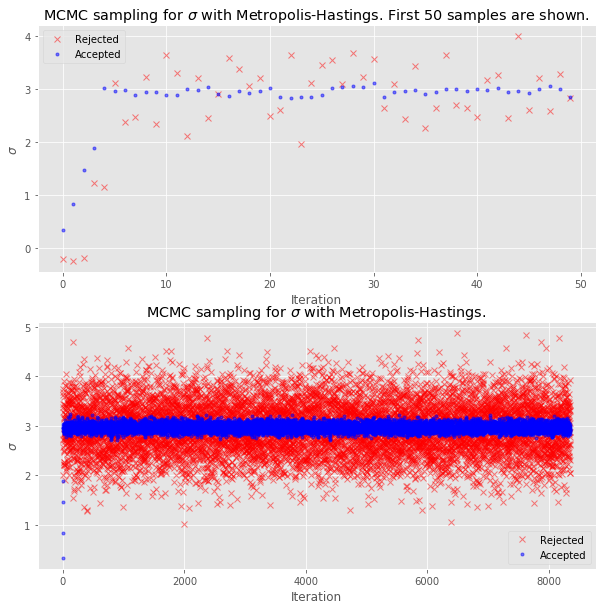

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
plt.plot(accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
plt.xlabel("Iteration")
plt.ylabel("$\sigma$")
plt.title("MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(rejected[-accepted.shape[0]:,1], 'rx', label='Rejected',alpha=0.5)
plt.plot(accepted[-accepted.shape[0]:,1], 'b.', label='Accepted',alpha=0.5)
plt.xlabel("Iteration")
plt.ylabel("$\sigma$")
plt.title("MCMC sampling for $\sigma$ with Metropolis-Hastings.")
plt.legend()

plt.show()

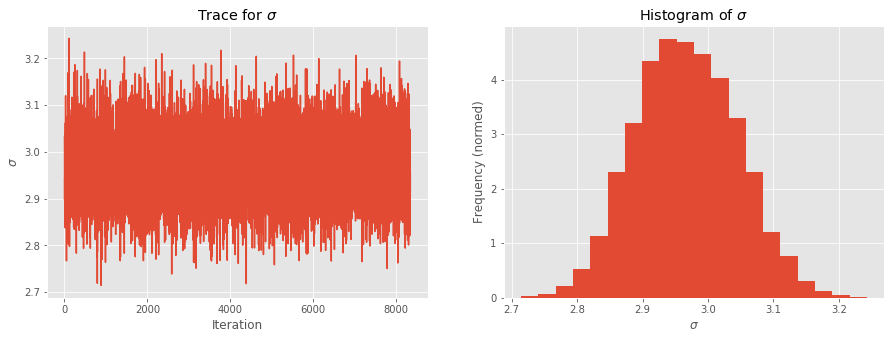

In [14]:
sigmas = accepted[:,1]
sigmas_accept = sigmas.mean() - 0.3

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.plot(sigmas[sigmas > sigmas_accept])
ax.set_title("Trace for $\sigma$")
ax.set_ylabel("$\sigma$")
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(sigmas[sigmas > sigmas_accept], bins=20,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("$\sigma$")
ax.set_title("Histogram of $\sigma$")
plt.show()

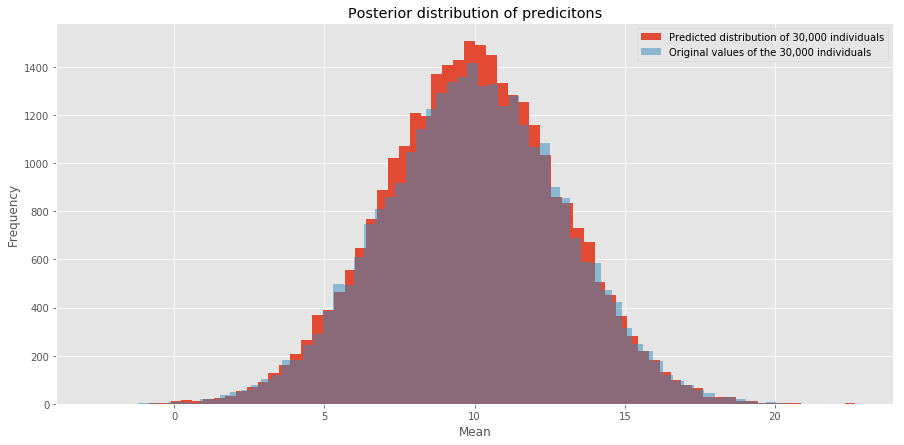

In [26]:
mu=accepted[sigmas > sigmas_accept,0].mean()
sigma=accepted[sigmas > sigmas_accept,1].mean()
observation_gen = np.random.normal(mu,sigma,population.shape[0])
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
ax.hist(observation_gen,bins=70 ,label="Predicted distribution of 30,000 individuals")
ax.hist(population,bins=70 ,alpha=0.5, label="Original values of the 30,000 individuals")
ax.set_xlabel("Mean")
ax.set_ylabel("Frequency")
ax.set_title("Posterior distribution of predicitons")
ax.legend()
plt.show()